In [10]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

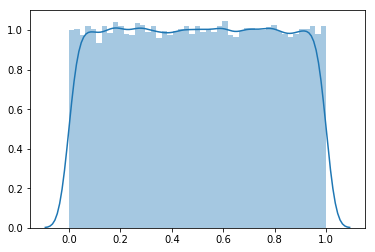

In [11]:
sample = np.random.uniform(size=100000)
sns.distplot(sample, kde=True)

## Sampling from a distribution 
The task at hand is to sample from the univariate normal distribution. To calculate the probability for event $X$ such that
$$ X \sim \mathcal{N}(0,1) $$
$$ f(x) = \frac{1}{{\sigma \sqrt {2\pi } }}\exp{{\frac {(x - \mu)^2}{2 \sigma}}} $$
We need to simulate the Probability = $P(X > 5)$
This can be done using the box muller algorithm to generate the p.d.f of Normal Distribution from $U(0,1)$

In [33]:
# Simulate the normal density 
# Using Box Muller Algorithm 
from numpy.random import uniform 
size = 100000000
unif1 = np.array(uniform(size=size))
unif2 = np.array(uniform(size=size))

LOG = np.log(unif1)
r = (-2*LOG)**0.5
theta = 2*np.pi*unif2
x = r*np.cos(theta)
y = r*np.sin(theta)

In [34]:
# Computing the probability
sum = 0
# Indicator Random variable h(x)
def h(x):
    if(x > 5):
        return 1
    else:
        return 0
for xi in list(x):
    sum += h(xi)
    
probability = sum/(len(x))
print(probability)

3.4e-07


We see that the Probability of $P(\mathbf{X}>5)$ is Out[14]: which comes for 100,000,000 simulations


## Monte Carlo Integration 
Monte Carlo is the art of approximating an expectation by the sample
mean of a function of simulated random variables. 

### Problem Statement
We need to sample according to the function $$g(x) = \frac{e^{-(x - \delta)}}{\int_{\delta}^{\infty}e^{-(x - \delta)}}$$

We have computed the random sample for $f(x)$ to compute the $E_{f}[\mathbf{X}]$
### Importance Sampling
There is an easier way to compute the expectation of the random variable X. 
$$\Rightarrow E_{f}[h(\mathbf{X})] = E_{g}[h(\mathbf{X})\frac{f(\mathbf{X})}{g(\mathbf{X})}]$$

In [50]:
def g(x):
    exponent = np.exp(-x+5)
    return exponent
    
def f(x):
    gauss = np.exp(-x**2/2)/(np.pi*2)**0.5
    return gauss

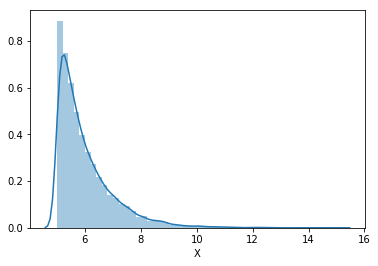

(10000,)


In [51]:
# Estimating the Expectation value from random sampling
# Generate the random variable g(x)
dummy_uniform = np.array(uniform(size=10000))
exponential = -np.log(dummy_uniform) + 5

sns.distplot(exponential, hist=True, kde=True)
plt.xlabel("X")
plt.show()

print(dummy_uniform.shape)

In [52]:
sum = 0
for xi in list(exponential):
    sum += h(xi)*(f(xi)/g(xi))
probability = sum/(len(exponential))
print(probability)

2.845879050411335e-07
